# Modelo de detección de emociones en perros

Conectar con Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Importar librerías

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

Obtener las imágenes

In [4]:
%cd "/content/drive/MyDrive/IA/Proyecto"
path = "/content/drive/MyDrive/IA/Proyecto"

base_dir = 'images'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')

/content/drive/MyDrive/IA/Proyecto


Data augmentation

Se voltearon las imágenes vertical y horizontalmente y se rotaron las imágenes 40 grados porque las fotos de perros suelen ser tomadas desde distintos ángulos. También se alargaron las imágenes para obtener escenarios con perros de distintas dimensiones.

Found 900 images belonging to 3 classes.


<Figure size 640x480 with 0 Axes>

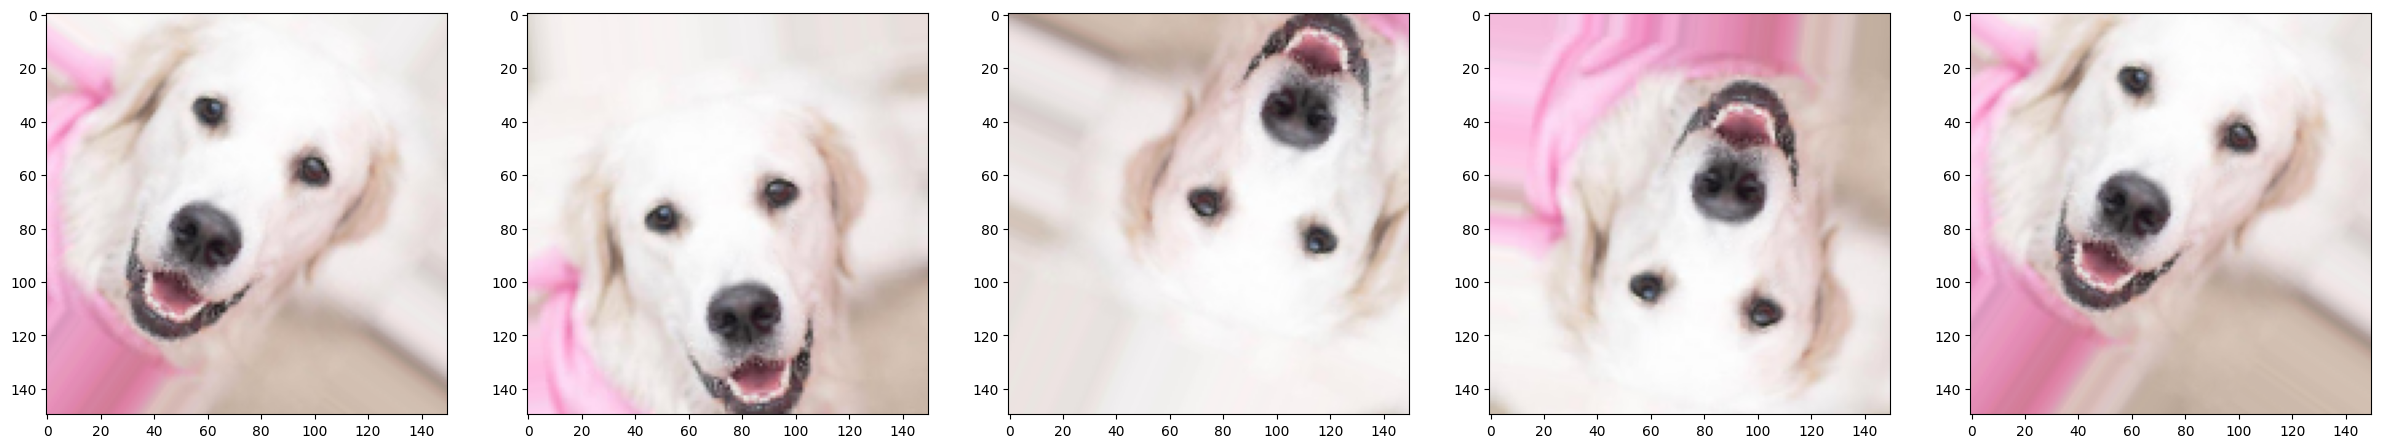

In [20]:
train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 40,
							width_shift_range = 0.2,
							height_shift_range = 0.2,
							shear_range = 0.3,
							horizontal_flip = True,
							vertical_flip = True,)

train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='categorical',
							)

plt.figure()

f, axarr = plt.subplots(1, 5, figsize=(30, 8)) 

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

Definición de las capas del modelo

Para la versión dos del modelo también se utilizó VGG16.

In [22]:
model = models.Sequential()

conv_base= VGG16(weights='imagenet',
								include_top = False,
								input_shape = (150,150,3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(3,activation='softmax'))

for layer in conv_base.layers[:-3]:
	conv_base.trainable = False 

for layer in conv_base.layers[-3:]:
	conv_base.trainable = True 
 
model.summary()

model.compile(loss='categorical_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['acc'])

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 8192)              0         
                                                                 
 dense_12 (Dense)            (None, 256)               2097408   
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 3)                 771       
                                                                 
Total params: 16,812,867
Trainable params: 16,812,867
Non-trainable params: 0
_________________________________________________________________


Entrenamiento del modelo

Epoch 1/40
113/113 [==============================] - 70s 118ms/step - loss: 1.2319 - acc: 0.3411
Epoch 2/40
113/113 [==============================] - 13s 116ms/step - loss: 1.0810 - acc: 0.3967
Epoch 3/40
113/113 [==============================] - 13s 115ms/step - loss: 1.0550 - acc: 0.4544
Epoch 4/40
113/113 [==============================] - 13s 111ms/step - loss: 1.0176 - acc: 0.4711
Epoch 5/40
113/113 [==============================] - 13s 117ms/step - loss: 0.9895 - acc: 0.4500
Epoch 6/40
113/113 [==============================] - 14s 120ms/step - loss: 0.9912 - acc: 0.5000
Epoch 7/40
113/113 [==============================] - 13s 116ms/step - loss: 0.9477 - acc: 0.5333
Epoch 8/40
113/113 [==============================] - 13s 116ms/step - loss: 0.8999 - acc: 0.5611
Epoch 9/40
113/113 [==============================] - 14s 119ms/step - loss: 0.8797 - acc: 0.5811
Epoch 10/40
113/113 [==============================] - 13s 116ms/step - loss: 0.8513 - acc: 0.5989
Epoch 11/40
113/113

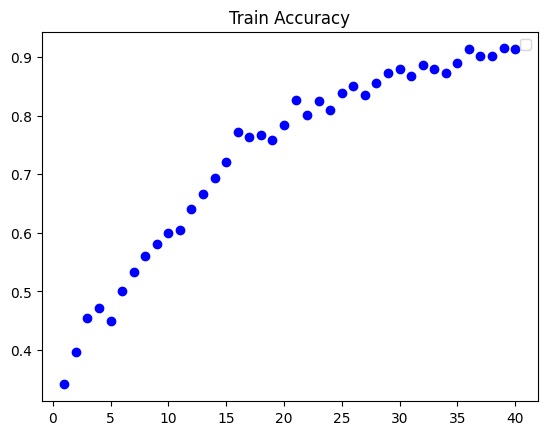

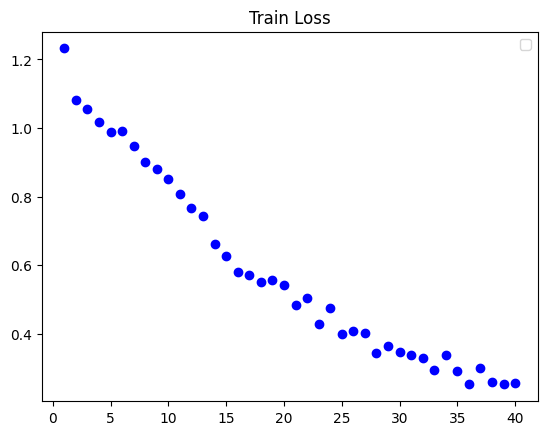

In [23]:
history = model.fit(train_generator, epochs = 40)
				
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo')
plt.title('Train Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo')
plt.title('Train Loss')
plt.legend()

plt.show()

Evaluación del modelo



In [25]:
test_datagen = ImageDataGenerator(1./255)

test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 20,
					class_mode= 'categorical')

test_loss, test_acc = model.evaluate(test_generator, steps = 25)

print('\nTest accuracy : ', test_acc)


Found 2100 images belonging to 3 classes.
25/25 [==============================] - 3s 104ms/step - loss: 141.4075 - acc: 0.6300

Test accuracy :  0.6299999952316284


Referencias

[1] Y. Mao and Y. Liu,"Pet dog facial expression recognition based on convolutional neural network and improved whale optimization algorithm". Springer Nature Scientific Reports. Feb. 2023. doi: 10.1038/s41598-023-30442-0